In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MiniBatchKMeans
from matplotlib import pyplot as plt
%matplotlib inline

In [159]:
class KMeansClustering:
    def __init__(self, n_clusters=5, random_state=42):
        self.n_clusters = n_clusters
        self.J_hist = []
        np.random.seed(random_state)
    
    def _init_centroids(self, X):
        initial_indexes = np.random.choice(len(X), size=self.n_clusters, replace=False)
        return X[initial_indexes]
    
    def _assign_clusters(self, X):

        def nearest_cluster(point):
            
            def distance_to_centroid(centroid):
                return np.linalg.norm(point - centroid)
            
            nearest = np.array([distance_to_centroid(centroid) for centroid in self.centroids]).argmin()
            return nearest
        
        res = np.array([nearest_cluster(point) for point in X])
        
        assert(res.shape[0] == X.shape[0])
        assert(len(res.shape) == 1)
        return res
    
    def _compute_new_centroids(self, X, cluster_ids):
        new_centroids = []
        for cluster in range(self.n_clusters):
            if len(X[cluster_ids == cluster]) == 0:
                new_centroids.append(self.centroids[cluster])
                continue
            cluster_mean = X[cluster_ids == cluster].mean(axis=0)
            new_centroids.append(cluster_mean)
        new_centroids = np.array(new_centroids)
        assert(new_centroids.shape[0] == self.n_clusters)
        
        return new_centroids
    
    def _compute_cost(self, X, centroid_ids):
        distances = [np.linalg.norm(point - self.centroids[centroid_id]) 
                     for (point, centroid_id) in zip(X, centroid_ids)]

        distances = np.array(distances)
        assert(distances.shape[0] == X.shape[0])
        return distances.mean()
    
    def fit(self, X):
        # select initial cluster centers
        self.centroids = self._init_centroids(X)
        # do initial cluster assignment
        clusters = self._assign_clusters(X)
        # repeat until stable:
        self.J_hist.append(self._compute_cost(X, clusters))
        while True:
            # compute center for all clusters
            self.centroids = self._compute_new_centroids(X, clusters)
            # reassign clusters
            new_clusters = self._assign_clusters(X)
            cost = self._compute_cost(X, new_clusters)
            self.J_hist.append(cost)
            if np.all(new_clusters == clusters):
                break
            else:
                clusters = new_clusters
        return self
    
    def predict(self, X):
        return self._assign_clusters(X)

In [163]:
X, _ = make_blobs(centers=10, n_samples=1000, random_state=42)

In [164]:
model = KMeansClustering(n_clusters=10, random_state=25).fit(X)

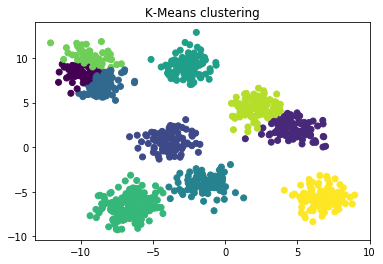

In [165]:
plt.scatter(X[: , 0], X[:, 1], c=model.predict(X))
plt.title("K-Means clustering");

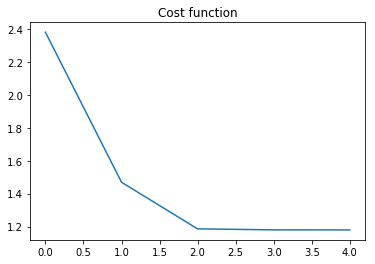

In [166]:
plt.plot(model.J_hist)
plt.title("Cost function");

56.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


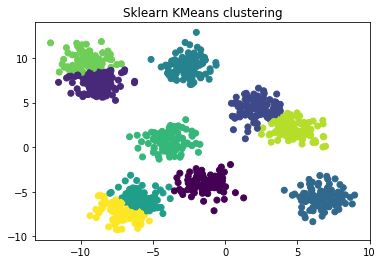

In [167]:
%%timeit -n 1 -r 1
kmeans = KMeans(n_clusters=10, n_jobs=-1).fit(X)
plt.scatter(X[: , 0], X[:, 1], c=kmeans.predict(X))
plt.title("Sklearn KMeans clustering");

65.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


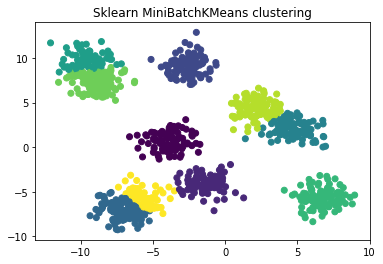

In [168]:
%%timeit -n 1 -r 1
# This one is significantly faster with huge (>10k samples) datasets
mini_batch_kmeans = MiniBatchKMeans(n_clusters=10).fit(X)
plt.scatter(X[: , 0], X[:, 1], c=mini_batch_kmeans.predict(X))
plt.title("Sklearn MiniBatchKMeans clustering");

# Selecting best model

In [177]:
X, _ = make_blobs(centers=10, n_samples=1000, random_state=42)

In [178]:
n_tries = 100
models = [KMeansClustering(n_clusters=10, random_state=i).fit(X) for i in range(n_tries)]

In [179]:
best_id = np.array([model.J_hist[-1] for model in models]).argmin()

In [180]:
best_model = models[best_id]

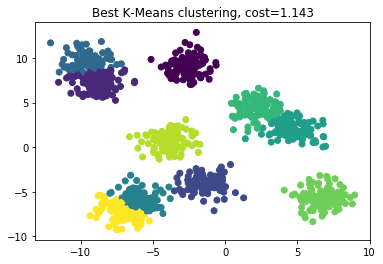

In [183]:
plt.scatter(X[: , 0], X[:, 1], c=best_model.predict(X))
plt.title("Best K-Means clustering, cost={:.3f}".format(best_model.J_hist[-1]));